#**ML Assignment 5 – Random Forest, Naive Bayes, SVM**

##**Crowdfunding Campaign Success Prediction**

The goal of this assignment is to develop and evaluate predictive classifier models to
determine the success of crowdfunding campaigns based on a variety of campaign features.
The dataset includes factors such as financial goals, actual funds raised, campaign duration,
and backer engagement. By building and comparing three distinct machine learning models
— Random Forest, Naive Bayes, and Support Vector Machine (SVM) — you will assess
which model best predicts the success of crowdfunding efforts.

***Dataset Link:***
https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/crowdfunding_campaign.csv

###**Machine Learning Model Building Steps:-**

**1. Data Preprocessing:**

***1.1. Load the Dataset:*** Load the dataset and perform an initial exploration to understand
its structure and content.


In [ ]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/ArchanaInsights/Datasets/refs/heads/main/crowdfunding_campaign.csv")
df.head() # Show first 5 rows

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,CID_00000,76159,73518.028955,15,1903,Film,September,Australia,GBP,11,Yes,41758,3,0
1,CID_00001,69394,60068.683288,49,469,Art,October,Australia,GBP,7,Yes,79112,48,0
2,CID_00002,18652,22958.153470,58,148,Film,February,USA,EUR,17,No,3942,9,1
3,CID_00003,19487,24229.048390,39,780,Film,October,Germany,AUD,10,No,22047,35,1
4,CID_00004,26734,17984.630311,68,1622,Games,September,Australia,AUD,12,Yes,72568,17,0


In [ ]:
df.shape # Show number of rows and columns

(100000, 14)

In [ ]:
df.info() # Show column names and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CampaignID           100000 non-null  object 
 1   GoalAmount           100000 non-null  int64  
 2   RaisedAmount         100000 non-null  float64
 3   DurationDays         100000 non-null  int64  
 4   NumBackers           100000 non-null  int64  
 5   Category             100000 non-null  object 
 6   LaunchMonth          100000 non-null  object 
 7   Country              100000 non-null  object 
 8   Currency             100000 non-null  object 
 9   OwnerExperience      100000 non-null  int64  
 10  VideoIncluded        100000 non-null  object 
 11  SocialMediaPresence  100000 non-null  int64  
 12  NumUpdates           100000 non-null  int64  
 13  IsSuccessful         100000 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 10.7+ MB


In [ ]:
df.describe() # Show summary statistics

,GoalAmount,RaisedAmount,DurationDays,NumBackers,OwnerExperience,SocialMediaPresence,NumUpdates,IsSuccessful
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50538.001310,50598.121803,52.047370,1003.347340,9.489130,50077.301010,24.483230,0.500940
std,28613.822592,33255.277493,21.653238,574.485153,5.763538,28767.521522,14.413833,0.500002
min,1000.000000,528.632349,15.000000,10.000000,0.000000,100.000000,0.000000,0.000000
25%,25724.750000,23396.500017,33.000000,505.000000,4.000000,25276.750000,12.000000,0.000000
50%,50706.000000,45980.674476,52.000000,1003.000000,9.000000,50024.500000,25.000000,1.000000
75%,75316.000000,72790.183158,71.000000,1502.000000,14.000000,74934.250000,37.000000,1.000000
max,99999.000000,149238.361559,89.000000,1999.000000,19.000000,99999.000000,49.000000,1.000000


***1.2. Handle Missing Values:*** Check for and handle any missing values in the dataset if
present.


In [ ]:
df.isnull().sum() # Check for missing values

,0
CampaignID,0
GoalAmount,0
RaisedAmount,0
DurationDays,0
NumBackers,0
Category,0
LaunchMonth,0
Country,0
Currency,0
OwnerExperience,0


***1.3. Encode Categorical Features:*** Convert categorical features into numerical format
using appropriate encoding techniques.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Iterate through each column in the DataFrame
for col in df.columns:
    # Check if the column's data type is 'object' and not 'CampaignID'
    if df[col].dtype == 'object' and col != 'CampaignID':
        # Fit and transform the column using LabelEncoder
        df[col] = le.fit_transform(df[col])

# Display the first few rows of the modified DataFrame
df.head()

,CampaignID,GoalAmount,RaisedAmount,DurationDays,NumBackers,Category,LaunchMonth,Country,Currency,OwnerExperience,VideoIncluded,SocialMediaPresence,NumUpdates,IsSuccessful
0,CID_00000,76159,73518.028955,15,1903,1,11,0,3,11,1,41758,3,0
1,CID_00001,69394,60068.683288,49,469,0,10,0,3,7,1,79112,48,0
2,CID_00002,18652,22958.153470,58,148,1,3,4,2,17,0,3942,9,1
3,CID_00003,19487,24229.048390,39,780,1,10,2,0,10,0,22047,35,1
4,CID_00004,26734,17984.630311,68,1622,2,11,0,0,12,1,72568,17,0


***1.4. Feature Selection:*** Select the relevant features and the target variable for your
analysis.


In [ ]:
X = df.drop(['CampaignID', 'IsSuccessful'], axis=1) # Feature Variable
Y = df['IsSuccessful'] # Target Variable

***1.5. Data Splitting:*** Split the dataset into training and testing sets (e.g., 75% training,
25% testing).


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=50)

***1.6. Feature Scaling:*** Standardize or normalize numerical features using parameters
derived from the training set, and apply the same scaling to the test set.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**2. Random Forest - Model Building and Evaluation:**

***2.1. Model Building:*** Build a Random Forest model using the training dataset.
Experiment with different values for the number of trees (n_estimators) in the
forest and maximum depth (max_depth).

***2.2. Model Evaluation:*** Evaluate the model on the testing dataset and report the
accuracy score

Accuracy with n_estimators=50, max_depth=5: 0.74432 - 74.43 %
Accuracy with n_estimators=50, max_depth=10: 0.8498 - 84.98 %
Accuracy with n_estimators=50, max_depth=15: 0.93196 - 93.2 %

Accuracy with n_estimators=100, max_depth=5: 0.7374 - 73.74 %
Accuracy with n_estimators=100, max_depth=10: 0.8526 - 85.26 %
Accuracy with n_estimators=100, max_depth=15: 0.92272 - 92.27 %

Accuracy with n_estimators=200, max_depth=5: 0.73404 - 73.4 %
Accuracy with n_estimators=200, max_depth=10: 0.84908 - 84.91 %
Accuracy with n_estimators=200, max_depth=15: 0.92144 - 92.14 %



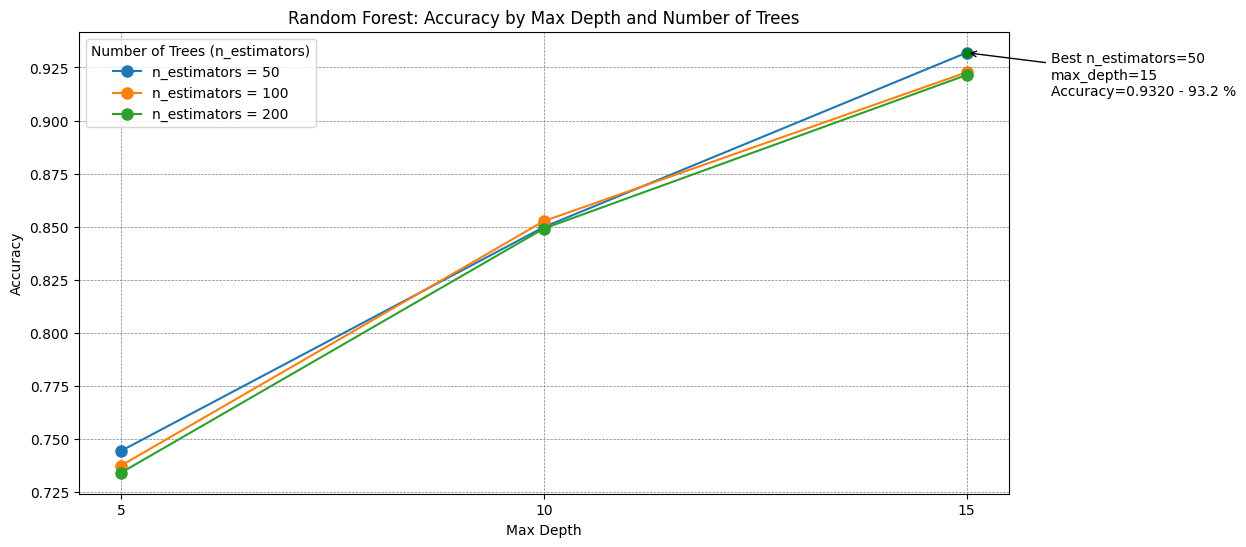

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Define hyperparameter ranges
n_estimators_values = [50, 100, 200]
max_depth_values = [5, 10, 15]

# Initialize dictionary to store accuracy results for plotting
results = {n: [] for n in n_estimators_values}
best_accuracy = 0
best_params = {}

# Train the model, print formatted accuracy, and collect data for plotting
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Create and train the RandomForestClassifier
        rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=50)
        rf_classifier.fit(X_train, Y_train)

        # Predict and calculate accuracy
        Y_pred = rf_classifier.predict(X_test)
        accuracy = accuracy_score(Y_test, Y_pred)

        # Print formatted accuracy
        print(f"Accuracy with n_estimators={n_estimators}, max_depth={max_depth}: {accuracy} - {round(accuracy * 100, 2)} %")

        # Store accuracy in results for plotting
        results[n_estimators].append(accuracy)

        # Track the best model parameters
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_params = {'n_estimators': n_estimators, 'max_depth': max_depth}

    # Add a blank line after each n_estimators block
    print()

# Plotting
plt.figure(figsize=(12, 6))
for n_estimators, accuracies in results.items():
    plt.plot(max_depth_values, accuracies, linestyle='-', marker='o', markersize=8, label=f'n_estimators = {n_estimators}')

# Highlight the best accuracy point
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
plt.plot(best_max_depth, best_accuracy, 'go')  # Green marker for highest accuracy
plt.annotate(f'Best n_estimators={best_n_estimators}\nmax_depth={best_max_depth}\nAccuracy={best_accuracy:.4f} - {round(best_accuracy * 100, 2)} %',
             xy=(best_max_depth, best_accuracy),
             xytext=(best_max_depth + 1, best_accuracy - 0.02),
             arrowprops=dict(facecolor='green', arrowstyle="->"))

# Customize plot
plt.title('Random Forest: Accuracy by Max Depth and Number of Trees')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.legend(title="Number of Trees (n_estimators)")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.show()

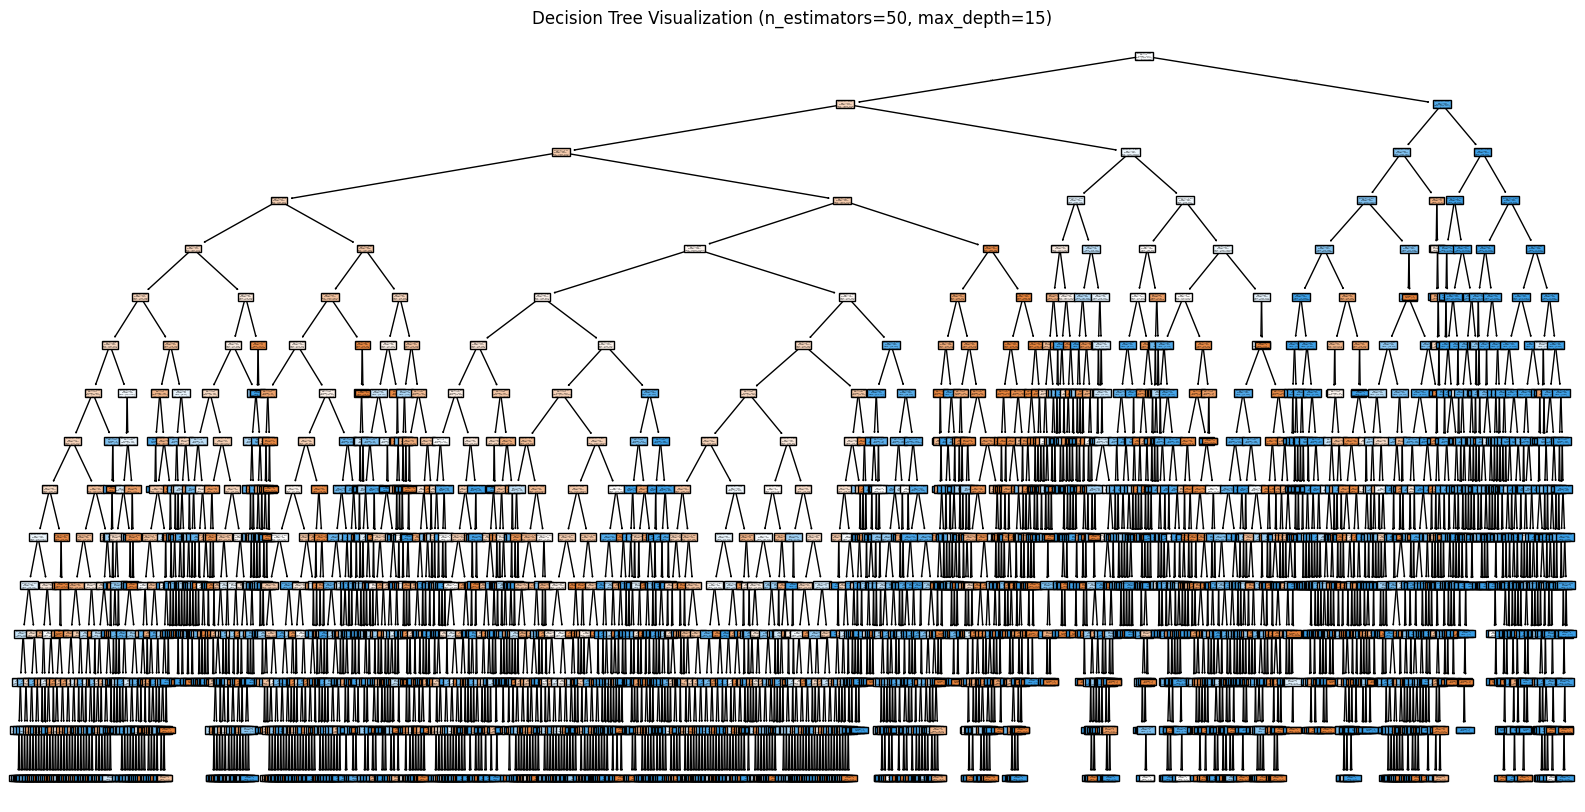

In [ ]:
from sklearn.tree import plot_tree

# Define the parameters for the desired accuracy
n_estimators = 50
max_depth = 15

# Train the Random Forest model with specified parameters
rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=50)
rf_classifier.fit(X_train, Y_train)

# Extract the first tree from the Random Forest
tree_for_best_accuracy = rf_classifier.estimators_[0]

# Plot the extracted decision tree
plt.figure(figsize=(20, 10))
feature_names = X_train.columns if hasattr(X_train, 'columns') else [f'Feature {i}' for i in range(X_train.shape[1])]
plot_tree(tree_for_best_accuracy, feature_names=feature_names, class_names=['IsSuccessful', 'IsNotSuccessful'], filled=True)
plt.title(f"Decision Tree Visualization (n_estimators={n_estimators}, max_depth={max_depth})")
plt.show()


**3. Naive Bayes - Model Building and Evaluation:**

***3.1. Model Building:*** Build a Naive Bayes model using the training dataset. You can
choose between Gaussian, Multinomial, or Bernoulli based on the nature of your
features (e.g., GaussianNB() for continuous features).

***3.2. Model Evaluation:*** Evaluate the model on the testing dataset and report the
accuracy score.


In [ ]:
from sklearn.naive_bayes import GaussianNB

# 3.1. Model Building
gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, Y_train)

# 3.2. Model Evaluation
Y_pred_gnb = gnb_classifier.predict(X_test)
accuracy_gnb = accuracy_score(Y_test, Y_pred_gnb)
print(f"Naive Bayes Accuracy: {accuracy_gnb} - {round(accuracy_gnb * 100, 2)} %")

Naive Bayes Accuracy: 0.66428 - 66.43 %


**4. Support Vector Machine (SVM) - Model Building and Evaluation:**

***4.1. Model Building:*** Build an SVM model using the training dataset. Experiment with
different kernel functions (e.g., linear, RBF).

***4.2. Model Evaluation:*** Evaluate the model on the testing dataset and report the
accuracy score.

SVM Accuracy (kernel=linear): 0.99852 - 99.85 %
SVM Accuracy (kernel=rbf): 0.9724 - 97.24 %


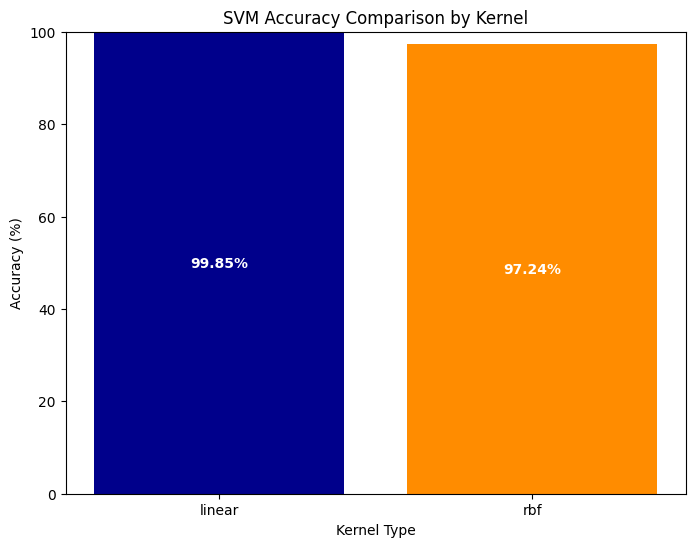

In [ ]:
from sklearn.svm import SVC

# Train the SVM classifier for different kernels
kernels = ['linear', 'rbf']
accuracies = []

for kernel in kernels:
    svm_classifier = SVC(kernel=kernel, random_state=50)
    svm_classifier.fit(X_train, Y_train)

    # Model evaluation
    Y_pred_svm = svm_classifier.predict(X_test)
    accuracy_svm = accuracy_score(Y_test, Y_pred_svm)
    print(f"SVM Accuracy (kernel={kernel}): {accuracy_svm} - {round(accuracy_svm * 100, 2)} %")

    # Store the accuracy for later use
    accuracies.append(accuracy_svm)

# Create a bar chart for accuracy comparison
plt.figure(figsize=(8, 6))
bars = plt.bar(kernels, [round(acc * 100, 2) for acc in accuracies], color=['darkblue', 'darkorange'])

# Add accuracy labels in the middle of the bars
for bar, accuracy in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() / 2, f'{round(accuracy * 100, 2)}%',
             ha='center', va='center', color='white', fontweight='bold')

# Customize the plot
plt.title("SVM Accuracy Comparison by Kernel")
plt.xlabel("Kernel Type")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 100)  # Ensure the y-axis is in the percentage range
plt.show()

**5. Comparison and Analysis:**

***5.1.*** Compare the accuracy scores of the three models

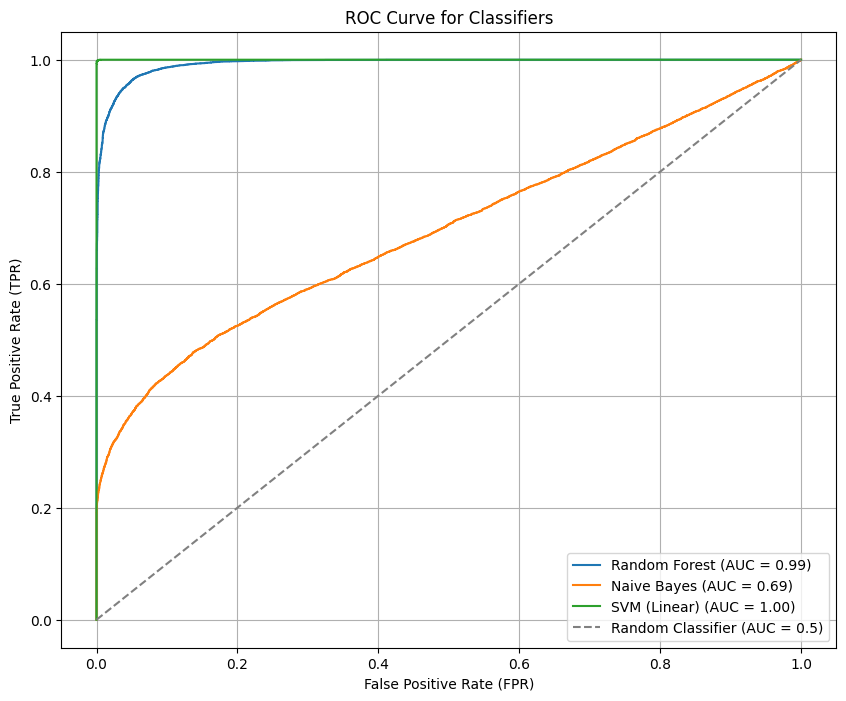

In [ ]:
from sklearn.metrics import f1_score, roc_curve, auc

# Define classifiers
classifiers = {
    'Random Forest': RandomForestClassifier(n_estimators=50, max_depth=15, random_state=50),  # Random Forest Best Accuracy Taken
    'Naive Bayes': GaussianNB(),
    'SVM (Linear)': SVC(kernel='linear', random_state=50, probability=True)  # Enable probability estimates for ROC
}

# Initialize an empty dictionary to store the results
results = {}
fpr_tpr_auc = {}  # For storing FPR, TPR, and AUC for each model

# Iterate through classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)  # Fit the model on training data
    y_pred = clf.predict(X_test)  # Make predictions on test data
    y_prob = clf.predict_proba(X_test)[:, 1]  # Get probabilities for ROC curve (for binary classification)

    # Calculate metrics
    accuracy = accuracy_score(Y_test, y_pred)
    f1 = f1_score(Y_test, y_pred)

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(Y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Store the results for display
    results[name] = {
        'Accuracy': f"{round(accuracy * 100, 2)} %",
        'F1 Score': f"{round(f1, 4)}"
    }
    fpr_tpr_auc[name] = {'FPR': fpr, 'TPR': tpr, 'AUC': roc_auc}

# Convert the results dictionary to a DataFrame
results_df = pd.DataFrame(results).T

# Sort the results by Accuracy in descending order
results_df['Accuracy'] = results_df['Accuracy'].apply(lambda x: float(x.strip(' %')))  # Convert accuracy to float for sorting
results_df = results_df.sort_values(by='Accuracy', ascending=False)

# Convert accuracy back to string with percentage after sorting
results_df['Accuracy'] = results_df['Accuracy'].apply(lambda x: f"{round(x, 2)} %")

# Plot ROC curves for each model
plt.figure(figsize=(10, 8))
for name, values in fpr_tpr_auc.items():
    plt.plot(values['FPR'], values['TPR'], label=f'{name} (AUC = {values["AUC"]:.2f})')

# Plot diagonal line (random model)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Classifier (AUC = 0.5)')

# Customize plot
plt.title('ROC Curve for Classifiers')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
# Display the results
results_df

,Accuracy,F1 Score
SVM (Linear),99.85 %,0.9985
Random Forest,93.2 %,0.9279
Naive Bayes,66.43 %,0.6075


***5.2.*** Discuss which model performed best and why, based on the accuracy scores and
other relevant factors.

### **Model Performance Analysis**

| Model           | Accuracy  | F1 Score |
|-----------------|-----------|----------|
| **SVM (Linear)** | 99.85%    | 0.9985   |
| **Random Forest**| 93.2%     | 0.9279   |
| **Naive Bayes**  | 66.43%    | 0.6075   |

### **Discussion**

1. **SVM (Linear)**:
   - **Best Model**: SVM achieved the highest accuracy (99.85%) and F1 score (0.9985).
   - **Reason**: The linear kernel worked well for this dataset, likely due to clear class separation, with minimal overfitting.

2. **Random Forest**:
   - **Good Performance**: Accuracy of 93.2% and F1 score of 0.9279.
   - **Reason**: Handles non-linear relationships better than SVM, but slightly less accurate.

3. **Naive Bayes**:
   - **Underperforming**: Accuracy of 66.43% and F1 score of 0.6075.
   - **Reason**: Assumes feature independence, which doesn't hold in this dataset, leading to poor performance.

### **Conclusion**

- **Best Model**: ***SVM (Linear)*** is the top performer with high accuracy and F1 score.
- **Alternative**: ***Random Forest*** could be used for handling complex, non-linear relationships.
- **Avoid**: ***Naive Bayes***, as its assumptions did not fit the data well.



***5.3.*** Reflect on the strengths and weaknesses of each model in the context of this dataset.

### **Model Strengths and Weaknesses Reflection**

#### **Random Forest**
- **Strengths**:
  - Good overall performance, capturing non-linear relationships.
  - Robust to outliers and noisy data.
  - Provides feature importance scores, aiding in understanding the model.

- **Weaknesses**:
  - Can be computationally expensive for very large datasets.
  - Prone to overfitting if not properly tuned (though this was mitigated by hyperparameter optimization).
  - Can be a "black box" model, making interpretation more challenging compared to decision trees.

#### **Naive Bayes**
- **Strengths**:
  - Simple and fast to train.
  - Works well with high-dimensional data.

- **Weaknesses**:
  - Strong assumption of feature independence, which is often violated in real-world data. This is a major limitation for this dataset.
  - Sensitive to irrelevant features.
  - Performance can be significantly impacted if the feature independence assumption is not met. This dataset clearly shows this.

#### **Support Vector Machine (SVM) with Linear Kernel**
- **Strengths**:
  - Excellent performance in this dataset, achieving very high accuracy.
  - Effective in high-dimensional spaces.
  - Relatively memory efficient.

- **Weaknesses**:
  - Performance heavily dependent on the choice of kernel. Other kernels might not perform as well.
  - Sensitive to the scaling of the data (which was addressed with StandardScaler).
  - Can be computationally expensive for very large datasets, particularly with non-linear kernels.
  - Interpretation can be less intuitive than decision trees or rule-based systems.


#**THANK YOU**